# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd 

StudentID = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
Tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0 ,3]

student_data = pd.DataFrame({'StudentID': [StudentID], 'Age': [Age], 'Tardies' : [Tardies]})

print(student_data.to_string(index=False))

                      StudentID                                      Age                         Tardies
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [17, 51, 27, 21, 36, 48, 19, 26, 54, 30] [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]


Draw a dispersion diagram (scatter plot) for the data.

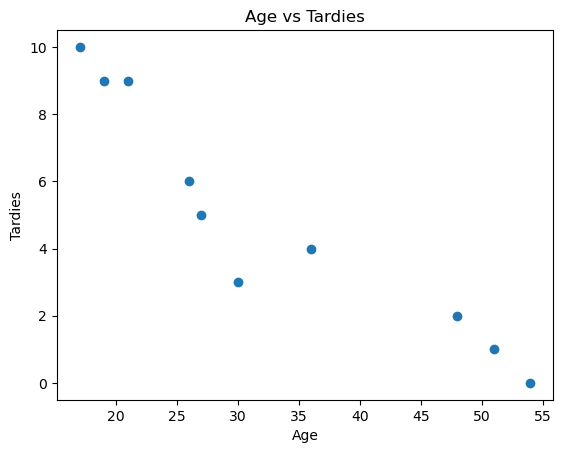

In [2]:
import matplotlib.pyplot as plt 

StudentID = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
Tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0 ,3]

plt.scatter (Age, Tardies)

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')

plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Yes, the younger the studs are the more often they are late to the classes. The number of late days go down as the age go up. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
import math 

Age = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
Tardies = [10, 1, 5, 9, 4, 2, 9, 6, 0 ,3]

#mean

n = len(Age)
avgX = sum(Age)/n 
avgY = sum(Tardies)/n

#deviation 

deviationx = [x - avgX for x in Age]
deviationy = [y - avgY for y in Tardies]

#covariance

covariance = sum(deviationx[i] * deviationy[i] for i in range (n)) / (n-1)

#std deviations

variancex = sum(deviation ** 2 for deviation in deviationx) / (n-1)
variancey = sum(deviation ** 2 for deviation in deviationy) / (n-1)
stdx = math.sqrt(variancex)
stdy = math.sqrt(variancey)


#correlation 

correlation = covariance / (stdx * stdy)

#results

print("Covariance: ", covariance)
print("Correlation: ", correlation)

print("Standard Deviation of Age: ", stdx)
print("Standard Deviation of Tardies: ", stdy)

Covariance:  -45.56666666666667
Correlation:  -0.9391626886887122
Standard Deviation of Age:  13.69874284580726
Standard Deviation of Tardies:  3.5418137224371984


In [5]:
# Since the covariance is -45.5/negative it suggests that as age increases the number of tardies tend to decrease

# As the correlation is also negative it suggests that both age and tardies have an inverse relationship. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
import numpy as np 
from sklearn.linear_model import LinearRegression

Age = np.array([17, 51, 27, 21, 36, 48, 19, 26, 54, 30]).reshape(-1,1)
Tardies = np.array([10, 1, 5, 9, 4, 2, 9, 6, 0 ,3])

#linear regression model 

model = LinearRegression() 

model.fit(Age, Tardies)

#predicting tardies for new age 

new_age = np.array([15, 25, 40]).reshape(-1,1)
predicted_tardies = model.predict(new_age)


print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)
print("Predicted tardies: ", predicted_tardies)

Intercept:  12.888803363135768
Coefficient:  [-0.24282077]
Predicted tardies:  [9.2464918  6.81828409 3.17597253]


In [7]:
# The outcome variable in this case is Tardies and i've used linear regression 

Plot your regression model on your scatter plot.

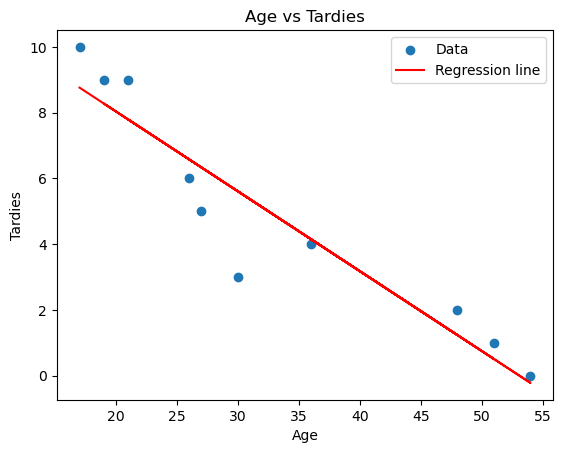

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


Age = np.array([17, 51, 27, 21, 36, 48, 19, 26, 54, 30]).reshape(-1, 1)
Tardies = np.array([10, 1, 5, 9, 4, 2, 9, 6, 0, 3])

model = LinearRegression() 
model.fit(Age, Tardies)

predicted_tardies = model.predict(Age)

#plot scatter
plt.scatter(Age, Tardies, label = 'Data')

#plot regression line
plt.plot(Age, predicted_tardies, color = 'red', label = 'Regression line')

plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies')

plt.legend()

plt.show()



Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Yes age is a good predictor of tardiness as we can see on the line of the regression model. 



## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
import pandas as pd 
import numpy as np 

stud_data = pd.read_csv('vehicles.csv')


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:
stud_data.head()


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
selected_columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

new_stud_data = stud_data[selected_columns]

new_stud_data.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
selected_columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']

new_stud_data = stud_data[selected_columns]

x = new_stud_data.drop('CO2 Emission Grams/Mile', axis = 1)
y = new_stud_data['CO2 Emission Grams/Mile']


model = LinearRegression()

model.fit(x,y)

print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)


Intercept:  769.8882836465644
Coefficients:  [-0.32061673  1.87879976 19.05292507 -3.04039938  0.03230948]


In [14]:
#The most important variables would be "Fuel Barrels/Year" and "Fuel Cost/Year" since they are the ones with larger
#magnitudes.

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [21]:
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

df =  pd.DataFrame(data)

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

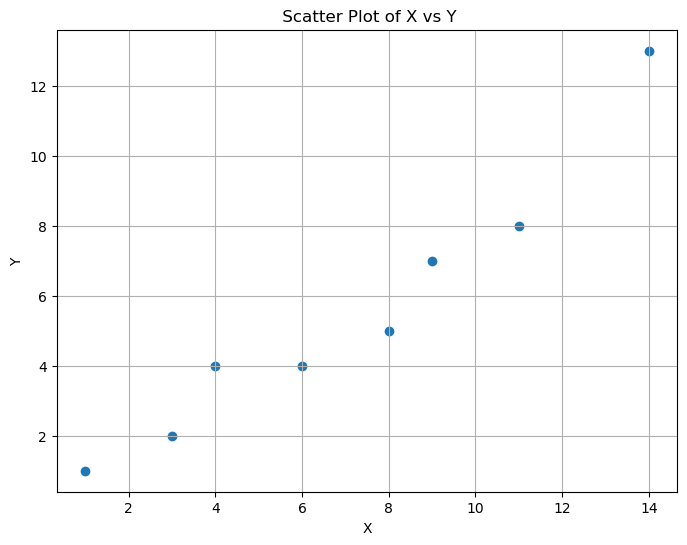

In [23]:
plt.figure(figsize = (8, 6 ))

plt.scatter(df ['X'], df ['Y']) 
plt.title(' Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [17]:
The relationship appears to be linear.


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

df =  pd.DataFrame(data)

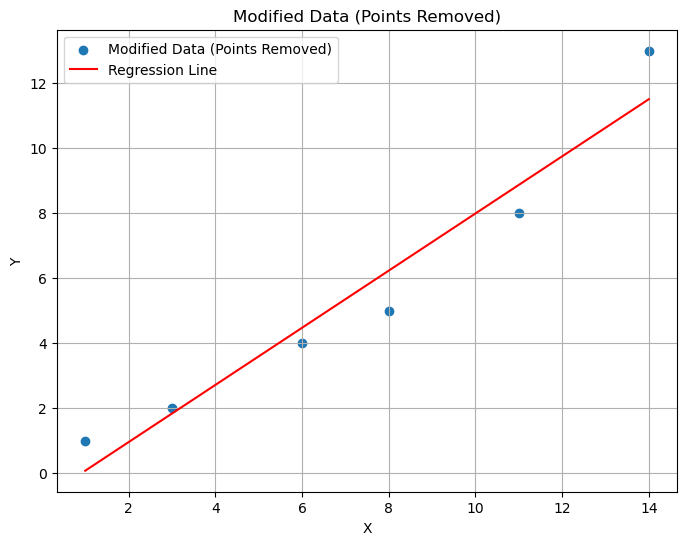

In [27]:
points_removed = [(4,4), (9,7)]
df_removed = df[~df.apply(lambda row: (row['X'], row['Y']) in points_removed, axis=1)]


x_removed = df_removed[['X']]
y_removed = df_removed['Y']

regressor_removed = LinearRegression() 
regressor_removed.fit (x_removed, y_removed)

slope_removed = regressor_removed.coef_[0]
intercept_removed = regressor_removed.intercept_

plt.figure(figsize=(8, 6))
plt.scatter(df_removed['X'], df_removed['Y'], label='Modified Data (Points Removed)')
plt.plot(x_removed, slope_removed * x_removed + intercept_removed, color='r', label='Regression Line')
plt.title('Modified Data (Points Removed)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [19]:
Without the points (4,4) and (9,7) it indicates a general trend, it also shows a stronger linear relationship.

